In [12]:
#!pip install mlxtend

In [119]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import StackingCVClassifier

In [120]:
#!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [149]:
#Importing the use packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn import preprocessing
# to build machine learning models
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

# to evaluate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import classification_report, roc_curve, average_precision_score, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Dependency for mlxtend
import warnings
warnings.filterwarnings('ignore')

In [150]:
train = pd.read_csv('train.csv/train.csv')
test = pd.read_csv('test.csv/test.csv')

print("shape of the train", train.shape)
print("shape of the test", test.shape)


shape of the train (26570, 26)
shape of the test (20775, 25)


In [151]:
# Droping the product_Code as this feature is have equal categories in train and test
train.drop("product_code", axis=1, inplace=True)
test.drop("product_code", axis=1, inplace=True)

In [153]:
for i in train.columns[train.isnull().any(axis=0)]:
    train[i].fillna(train[i].mean(), inplace=True)

for i in test.columns[test.isnull().any(axis=0)]:
    test[i].fillna(test[i].mean(), inplace=True)
    

In [154]:
#split the attribute_2 and attribute_3
train["attribute_0"] = pd.factorize(train.attribute_0)[0]
train["attribute_1"] = pd.factorize(train.attribute_1)[0]

test["attribute_0"] = pd.factorize(test.attribute_0)[0]
test["attribute_1"] = pd.factorize(test.attribute_1)[0]


In [171]:
X = train.drop(["failure"], axis=1)
y = train["failure"]

(26570, 23)

In [210]:

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle=True, stratify=y, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=10)

X_train.shape

(21256, 23)

In [211]:
# def find_outliers_IQR(df):
#     q1=df.quantile(0.25)

#     q3=df.quantile(0.75)

#     IQR=q3-q1

#     outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#     return outliers

In [212]:
# outliers = find_outliers_IQR(X["measurement_4"])

# outliers

In [213]:
# from sklearn.preprocessing import PowerTransformer
# X_train_pt = PowerTransformer().fit_transform(X_train)
# col_select = X_train.columns
# x_train_pt = pd.DataFrame(x_train_pt, columns=col_select)
# x_train_pt

In [214]:
#from sklearn.preprocessing import power_transform
# from sklearn.preprocessing import PowerTransformer

# #power = PowerTransformer(method='yeo-johnson', standardize=True)
# pt = PowerTransformer(method="yeo-johnson", standardize=False)
# x_train_pt = pt.fit_transform(X_train)
# x_test_pt = pt.transform(X_test)
# x_train_pt

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_ss = scaler.fit_transform(X_train)
# X_test_ss = scaler.fit_transform(X_test)
# X_train_ss

In [215]:
feature = X_train.columns
feature

Index(['id', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
       'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11',
       'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
       'measurement_16', 'measurement_17'],
      dtype='object')

In [216]:
x_train_df = pd.DataFrame(X_train_ss, columns=feature)
x_test_df = pd.DataFrame(X_test_ss, columns=feature)

In [217]:
x_train_df.head()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.458624,0.151411,-0.495129,0.278479,-0.513260,-0.847372,-0.834663,-0.054906,0.833129,1.623233,...,0.332136,-0.185989,1.035534,-0.828399,1.617407,-0.335119,0.772734,-0.752257,1.009241,-0.549497
1,1.441529,0.726768,-0.495129,1.607473,-0.513260,1.210798,0.137946,-0.530972,-0.375057,-0.742281,...,-0.187907,-1.419476,-1.362730,1.619944,0.019539,-1.045959,-0.513602,-2.056653,-0.325598,0.111642
2,-0.752618,0.287619,2.019676,0.278479,0.844447,0.524742,0.381098,-0.054906,0.531083,1.124004,...,0.538535,-0.161360,-1.381026,-0.133023,-0.626540,-0.844778,-0.885597,-0.247114,-0.494665,-0.003774
3,-1.326522,0.285824,-0.495129,-1.050516,1.523301,-1.533428,2.812620,-1.007038,0.229036,-0.392922,...,-1.776366,0.157787,0.051199,0.962412,1.191771,1.056159,0.673304,0.002479,-0.344518,-0.737034
4,-1.138174,0.904275,-0.495129,-1.050516,1.523301,-1.533428,-0.105207,-1.959169,0.229036,-0.018248,...,1.270035,-1.438974,-0.151522,-0.558088,1.344973,-0.834048,-1.073333,0.275448,-0.110143,1.176034


In [218]:
from scipy import stats
col_select = []
alpha = 0.05

for col in x_test_df:
    _, p_value = stats.shapiro(x_train_df[col])
    if (p_value <= alpha):
        col_select.append(col)
x_train_2 = x_test_df[col_select]

In [219]:
x_train_2.head()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.817519,-1.502840,-0.500647,0.266362,-0.508560,-0.869162,-0.568453,-0.534310,0.812960,0.993485,...,-0.175629,0.634420,0.132122,0.188220,-0.139048,-0.459482,0.840559,-0.197313,-0.013862,-0.195192
1,-1.359694,0.319157,-0.500647,-1.058964,1.536713,-1.558009,-0.326424,-0.534310,1.115846,0.908750,...,1.439333,-0.336057,0.443699,0.727833,0.009266,-0.438692,-0.053226,-0.156002,-1.500547,0.953976
2,0.308290,0.478501,-0.500647,-1.058964,-1.190317,0.508534,-0.568453,2.566688,-0.398586,0.856684,...,-0.182708,-1.178088,-0.729931,-0.592655,1.304228,0.003226,2.849144,-1.532107,-1.085856,0.015028
3,1.226368,-0.802514,-0.500647,1.591688,-0.508560,1.197382,-0.568453,0.658382,-1.004358,-0.024359,...,-1.118112,1.558003,0.312017,1.628320,2.116115,-1.032552,-2.052081,0.410151,0.523047,-1.325120
4,1.556824,-1.225688,-0.500647,1.591688,-0.508560,1.197382,0.883719,-0.534310,0.510073,0.238014,...,0.280443,-0.677559,1.178388,0.661910,-0.944019,0.565538,1.071998,0.621442,0.001781,-0.418944


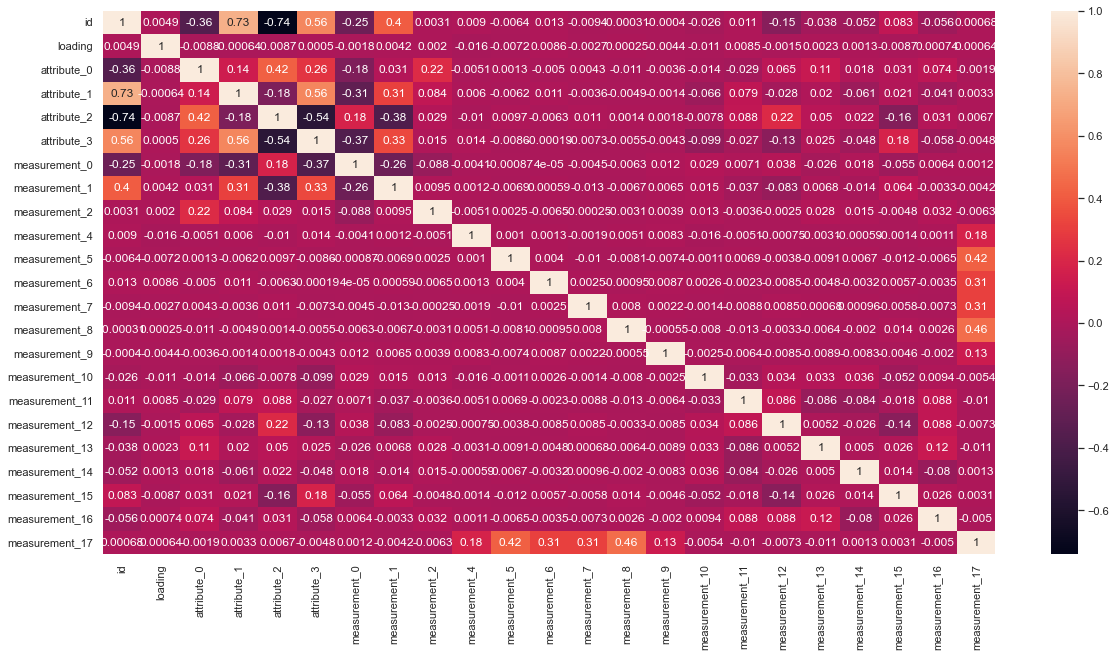

In [220]:
# Correlation with all variables
plt.figure(figsize = (20,10))
sns.heatmap(x_train_df.corr(),annot = True)
plt.show()

In [221]:
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 3, scoring=scoring)
    return np.mean(xval)

In [222]:
def ModelResults(Name,ytest,ypred,false_positive_rate, true_positive_rate, threshold):
    print('*'*70)
    print(Name)
    print('*'*70)
    # Calculate average precision 
    average_precision = average_precision_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    # Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, test_pred)
    print('ROC AUC Score:',roc_auc)
    print('Classification report:\n', classification_report(ytest, ypred))
    print('Confusion matrix:\n', confusion_matrix(y_true = ytest, y_pred = ypred))
    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(ypred , ytest)))
    print("F1 Score: {}".format(f1_score(y_true = ytest, y_pred = ypred)))
    print("Recall score: {}".format(recall_score(y_true = ytest, y_pred = ypred)))
    print("Precision score: {}".format(precision_score(y_true = ytest, y_pred = ypred)))
    # Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
    # Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)
    print('*'*70)

**********************************************************************
Decision Tree Classifier: 
**********************************************************************
ROC AUC Score: 0.49807658156357054
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      4243
           1       0.20      0.16      0.18      1071

    accuracy                           0.70      5314
   macro avg       0.50      0.50      0.50      5314
weighted avg       0.68      0.70      0.69      5314

Confusion matrix:
 [[3558  685]
 [ 897  174]]
Accuracy :0.70230
F1 Score: 0.18031088082901556
Recall score: 0.16246498599439776
Precision score: 0.20256111757857975


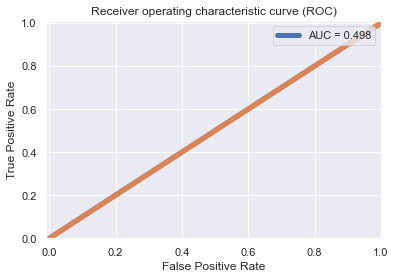

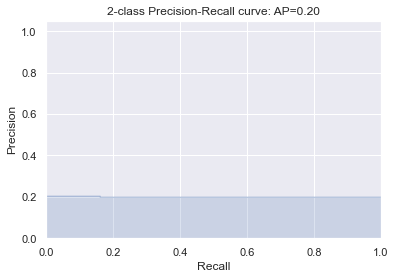

**********************************************************************


In [223]:
# Fit a decision tree model to our data
dt = DecisionTreeClassifier(max_depth=21, min_samples_leaf=5)
dt.fit(x_train_df, y_train)
test_pred = dt.predict(x_test_df)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, test_pred)
probs= dt.predict_proba(x_test_df)
ModelResults("Decision Tree Classifier: ", y_test, test_pred, false_positive_rate, true_positive_rate, threshold)

In [224]:
# Comparing the actual vs predicted also evaluating 
test_pred_final = pd.DataFrame({'faliure':y_test.values, 'faliur_Prob':test_pred})
test_pred_final['id'] = X_test.id
test_pred_final.head(20)

,faliure,faliur_Prob,id
0,0,0,0.0
1,0,1,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN
5,0,0,5.0
6,1,0,NaN
7,0,0,7.0
8,0,0,NaN
9,1,0,NaN


**********************************************************************
XGB Classifier: 
**********************************************************************
ROC AUC Score: 0.5079612644806528
Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4243
           1       0.50      0.00      0.00      1071

    accuracy                           0.80      5314
   macro avg       0.65      0.50      0.44      5314
weighted avg       0.74      0.80      0.71      5314

Confusion matrix:
 [[4242    1]
 [1070    1]]
Accuracy :0.79846
F1 Score: 0.0018639328984156572
Recall score: 0.0009337068160597573
Precision score: 0.5


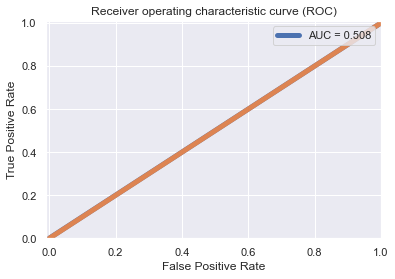

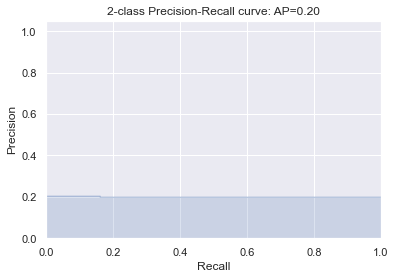

**********************************************************************


In [225]:
#Fit the XGB Classifier on train data and prdiction on test data
# call the model
classifier_xgb = XGBClassifier(n_estimators = 30, learning_rate =0.11, min_child_weight=3,
                               subsample=0.8, max_depth =9, colsample_bytree=0.8,
                               objective= 'binary:logistic', nthread=4, scale_pos_weight=1,
                               seed = 10)

# # train the model
classifier_xgb.fit(x_train_df, y_train)
# Create true and false positive rates
pred_test = classifier_xgb.predict(x_test_df)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred_test)
probs= classifier_xgb.predict_proba(x_test_df)
ModelResults("XGB Classifier: ", y_test, pred_test, false_positive_rate, true_positive_rate, threshold)

**********************************************************************
Random Forest: 
**********************************************************************
ROC AUC Score: 0.49501348186379585
Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4243
           1       0.00      0.00      0.00      1071

    accuracy                           0.80      5314
   macro avg       0.40      0.50      0.44      5314
weighted avg       0.64      0.80      0.71      5314

Confusion matrix:
 [[4243    0]
 [1071    0]]
Accuracy :0.79846
F1 Score: 0.0
Recall score: 0.0
Precision score: 0.0


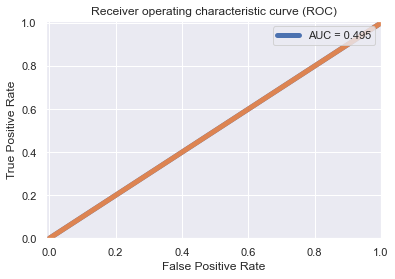

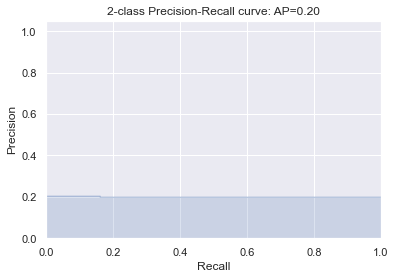

**********************************************************************


In [226]:
# Fit the Random Forest Classifer on train data and prediction on test data
from sklearn.ensemble import RandomForestClassifier
# call the model
classifier_rf = RandomForestClassifier(max_depth=3, min_samples_leaf=20, n_estimators=9, n_jobs=1, random_state=42)
# train the model
classifier_rf.fit(x_train_df, y_train)
pred_test = classifier_rf.predict(x_test_df)
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred_test)
probs = classifier_rf.predict_proba(x_test_df)
ModelResults("Random Forest: ", y_test, pred_test, false_positive_rate, true_positive_rate, threshold)

In [227]:
# Stacking all pretrained model into StackingCVClassifier
stacking = StackingCVClassifier(classifiers=[classifier_xgb, classifier_rf], meta_classifier=dt, use_probas=True, cv=10)

# Do CV
from sklearn import model_selection

for clf, label in zip([classifier_xgb, classifier_rf, dt, stacking],
                      ['xgb_model',
                       'RandomForest',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, x_train_df, y_train, cv=10, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.51 (+/- 0.01) [xgb_model]
Accuracy: 0.50 (+/- 0.01) [RandomForest]
Accuracy: 0.50 (+/- 0.02) [StackingClassifier]
